## Research question

### Does the quality of family relationships, parents' cohabitation status have an impact on alcohol consumption?

selected columns::
[['famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes', 'Medu', 'Fedu']]

# Best Classifiers

## XGBoost
### Train Acc= 0.9417040358744395
### Test Acc= 0.7081339712918661

## Random Forest
### Train Acc= 0.952914798206278
### Test Acc= 0.7511961722488039

## Soft Voting
### Test Acc= 0.7679372197309418
### Train Acc= 0.6602870813397129

## KNN(k=6)
### Train Acc= 0.743274
### Test Acc= 0.655502

## Out of Bag on DecisionTree
### Train Accuracy 0.952914798206278
### Test Accuracy 0.7416267942583732
### OOB Score 0.7982062780269058

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import scikitplot as skplt



from sklearn import set_config
#set_config(transform_output = "pandas")

## Function to save figures

In [2]:
from pathlib import Path
IMAGES_PATH = Path() / "images/question 3"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=600):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# Import train and test sets
X_train = pd.read_csv('smoteTrainSet.csv')
X_test = pd.read_csv('ScaledTestSet.csv')

In [4]:
X_train.columns

Index(['sex_F', 'sex_M', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A',
       'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'higher_no', 'higher_yes', 'romantic_no',
       'romantic_yes', 'age', 'Medu', 'Fedu', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'health', 'absences', 'G1', 'G2', 'G3',
       'alc'],
      dtype='object')

In [5]:
X_train.shape

(892, 45)

In [6]:
# Separate target from dataset
y_train = X_train['alc']
X_train = X_train[['age', 'Fedu', 'Medu','famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Mjob_at_home', 'Mjob_health', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famrel', 'famsup_no']] 
y_test = X_test['alc']
X_test = X_test[['age', 'Fedu', 'Medu','famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Mjob_at_home', 'Mjob_health', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famrel', 'famsup_no']] 

In [7]:
y_train.value_counts()

1.0    446
0.0    446
Name: alc, dtype: int64

## 0R classifier

In [8]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = "most_frequent")



In [9]:
dummy.fit(X_train,y_train)

DummyClassifier(strategy='most_frequent')

In [10]:
from sklearn.metrics import accuracy_score
print('Train Accuracy', accuracy_score(y_train, dummy.predict(X_train)))
print('Test Accuracy', accuracy_score(y_test, dummy.predict(X_test)))

Train Accuracy 0.5
Test Accuracy 0.6076555023923444


## Finding suitable value of k for KNN

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

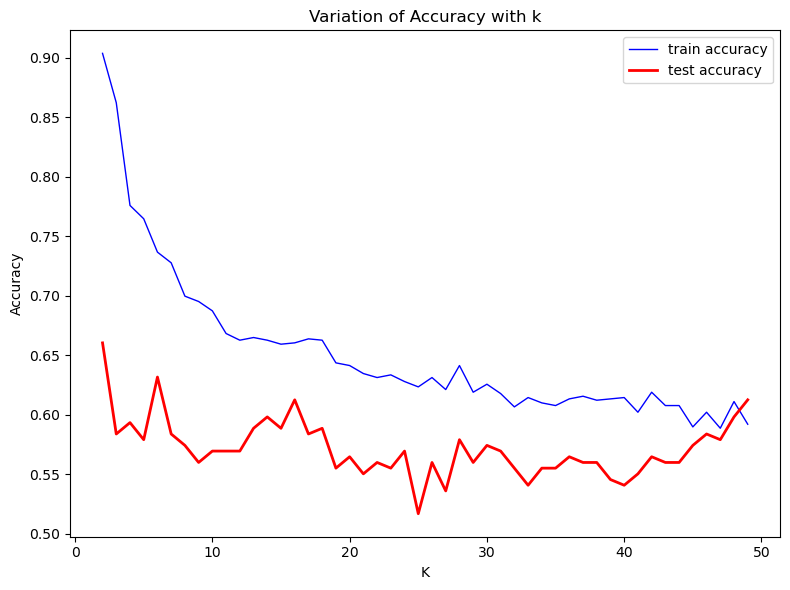

In [12]:
k = range(2, 50)
train_acc = []
test_acc = []
neighbors = []

for i in k:
    neighbors.append(i)
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))

plt.figure(figsize = (8,6))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with k')
plt.plot(neighbors, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(neighbors, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against k')
plt.show();

In [13]:
pd.DataFrame({'K': neighbors, 'Train Acc': train_acc, 'Test Acc': test_acc})

K  Train Acc  Test Acc
0    2   0.903587  0.660287
1    3   0.862108  0.583732
2    4   0.775785  0.593301
3    5   0.764574  0.578947
4    6   0.736547  0.631579
5    7   0.727578  0.583732
6    8   0.699552  0.574163
7    9   0.695067  0.559809
8   10   0.687220  0.569378
9   11   0.668161  0.569378
10  12   0.662556  0.569378
11  13   0.664798  0.588517
12  14   0.662556  0.598086
13  15   0.659193  0.588517
14  16   0.660314  0.612440
15  17   0.663677  0.583732
16  18   0.662556  0.588517
17  19   0.643498  0.555024
18  20   0.641256  0.564593
19  21   0.634529  0.550239
20  22   0.631166  0.559809
21  23   0.633408  0.555024
22  24   0.627803  0.569378
23  25   0.623318  0.516746
24  26   0.631166  0.559809
25  27   0.621076  0.535885
26  28   0.641256  0.578947
27  29   0.618834  0.559809
28  30   0.625561  0.574163
29  31   0.617713  0.569378
30  32   0.606502  0.555024
31  33   0.614350  0.540670
32  34   0.609865  0.555024
33  35   0.607623  0.555024
34  36   0.613229  0.564593
35  37   0.615471  0.559809
36  38   0.612108  0.559809
37  39   0.613229  0.545455
38  40   0.614350  0.540670
39  41   0.602018  0.550239
40  42   0.618834  0.564593
41  43   0.607623  0.559809
42  44   0.607623  0.559809
43  45   0.589686  0.574163
44  46   0.602018  0.583732
45  47   0.588565  0.578947
46  48   0.610987  0.598086
47  49   0.591928  0.612440

## Applying suitable value of k in KNN Classifier

In [14]:
best_grid_knn= KNeighborsClassifier(n_neighbors=2)
best_grid_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[104  23]
 [ 48  34]]
Accuracy Score 0.6602870813397129
Classification report:               precision    recall  f1-score   support

         0.0       0.68      0.82      0.75       127
         1.0       0.60      0.41      0.49        82

    accuracy                           0.66       209
   macro avg       0.64      0.62      0.62       209
weighted avg       0.65      0.66      0.64       209

Accuracy Score 0.6602870813397129
Classification report: 
              precision    recall  f1-score   support

         0.0       0.68      0.82      0.75       127
         1.0       0.60      0.41      0.49        82

    accuracy                           0.66       209
   macro avg       0.64      0.62      0.62       209
weighted avg       0.65      0.66      0.64       209



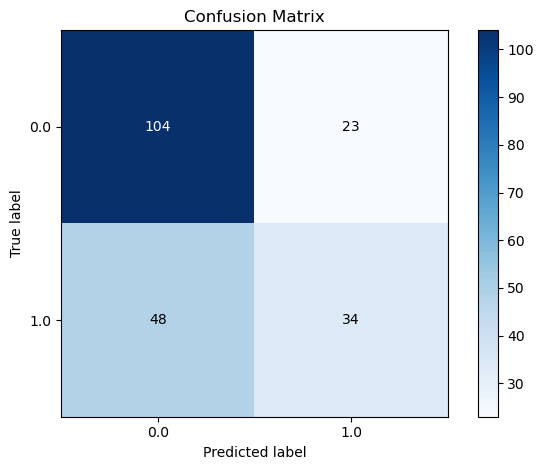

In [15]:
best_grid_knn.fit(X_train, y_train)
y_pred=best_grid_knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for KNN hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))
save_fig('Test Set Confusion Matrix for KNN hyper-para tuned q3')

Classification Report for Train Set
Accuracy Score 0.9035874439461884
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       446
         1.0       0.99      0.81      0.89       446

    accuracy                           0.90       892
   macro avg       0.92      0.90      0.90       892
weighted avg       0.92      0.90      0.90       892



/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

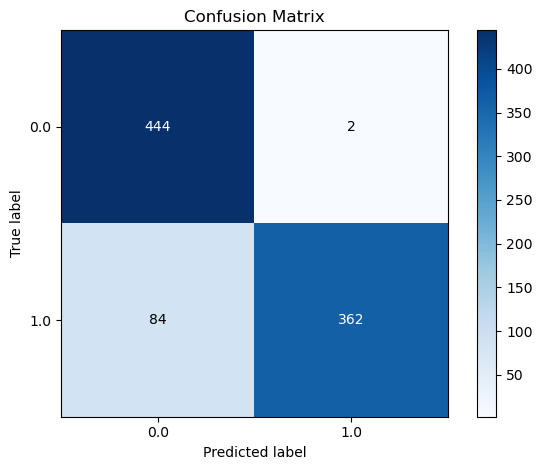

In [16]:
print("Classification Report for Train Set")
print("Accuracy Score {}".format(accuracy_score(y_train, best_grid_knn.predict(X_train).round (3))))
print(classification_report (y_train, best_grid_knn.predict(X_train)))
skplt.metrics.plot_confusion_matrix(y_train, best_grid_knn.predict(X_train));
save_fig('Train Set Confusion Matrix train for KNN hyper-para tuned q3')

## Hyperparameter Tuning on Decision Tree

In [17]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [18]:
param_grid = {
    'criterion' : ['gini'],
    'max_depth' : range(2,20),
}

In [19]:
dt_grid = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator=dt_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_dt.fit(X_train,y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': range(2, 20)},
             verbose=2)

In [20]:
best_grid_dt = grid_search_dt.best_estimator_
best_grid_dt

DecisionTreeClassifier(max_depth=19)

## Appying best estimators on Decision Tree

[[444   2]
 [ 12 434]]
Accuracy Score 0.984304932735426
Classification report: 
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       446
         1.0       1.00      0.97      0.98       446

    accuracy                           0.98       892
   macro avg       0.98      0.98      0.98       892
weighted avg       0.98      0.98      0.98       892



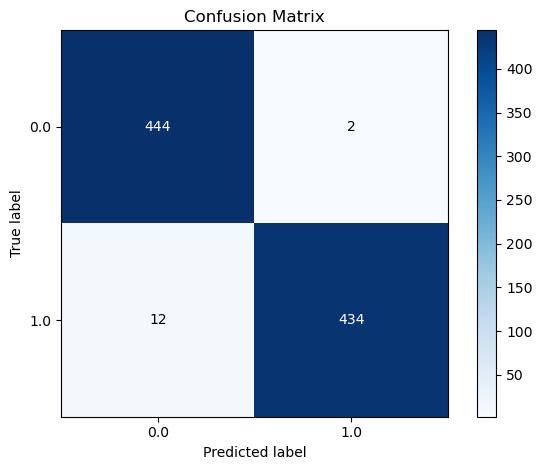

In [21]:
y_pred=best_grid_dt.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred, cmap='Blues');
save_fig('Train Set Confusion Matrix for Decision Tree hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))


[[104  23]
 [ 17  65]]
Accuracy Score 0.8086124401913876
Classification report: 
              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84       127
         1.0       0.74      0.79      0.76        82

    accuracy                           0.81       209
   macro avg       0.80      0.81      0.80       209
weighted avg       0.81      0.81      0.81       209



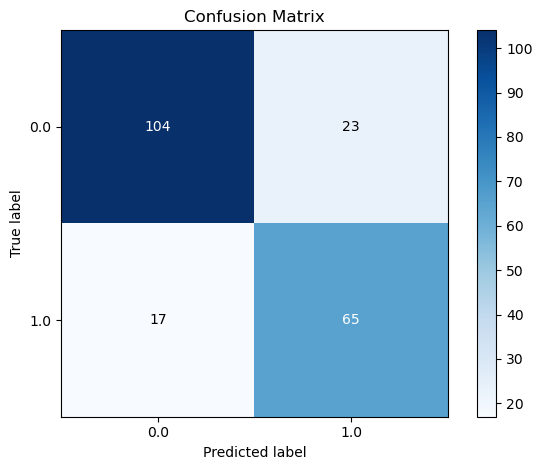

In [22]:
best_grid_dt.fit(X_train, y_train)
y_pred=best_grid_dt.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for Descision_Tree hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))


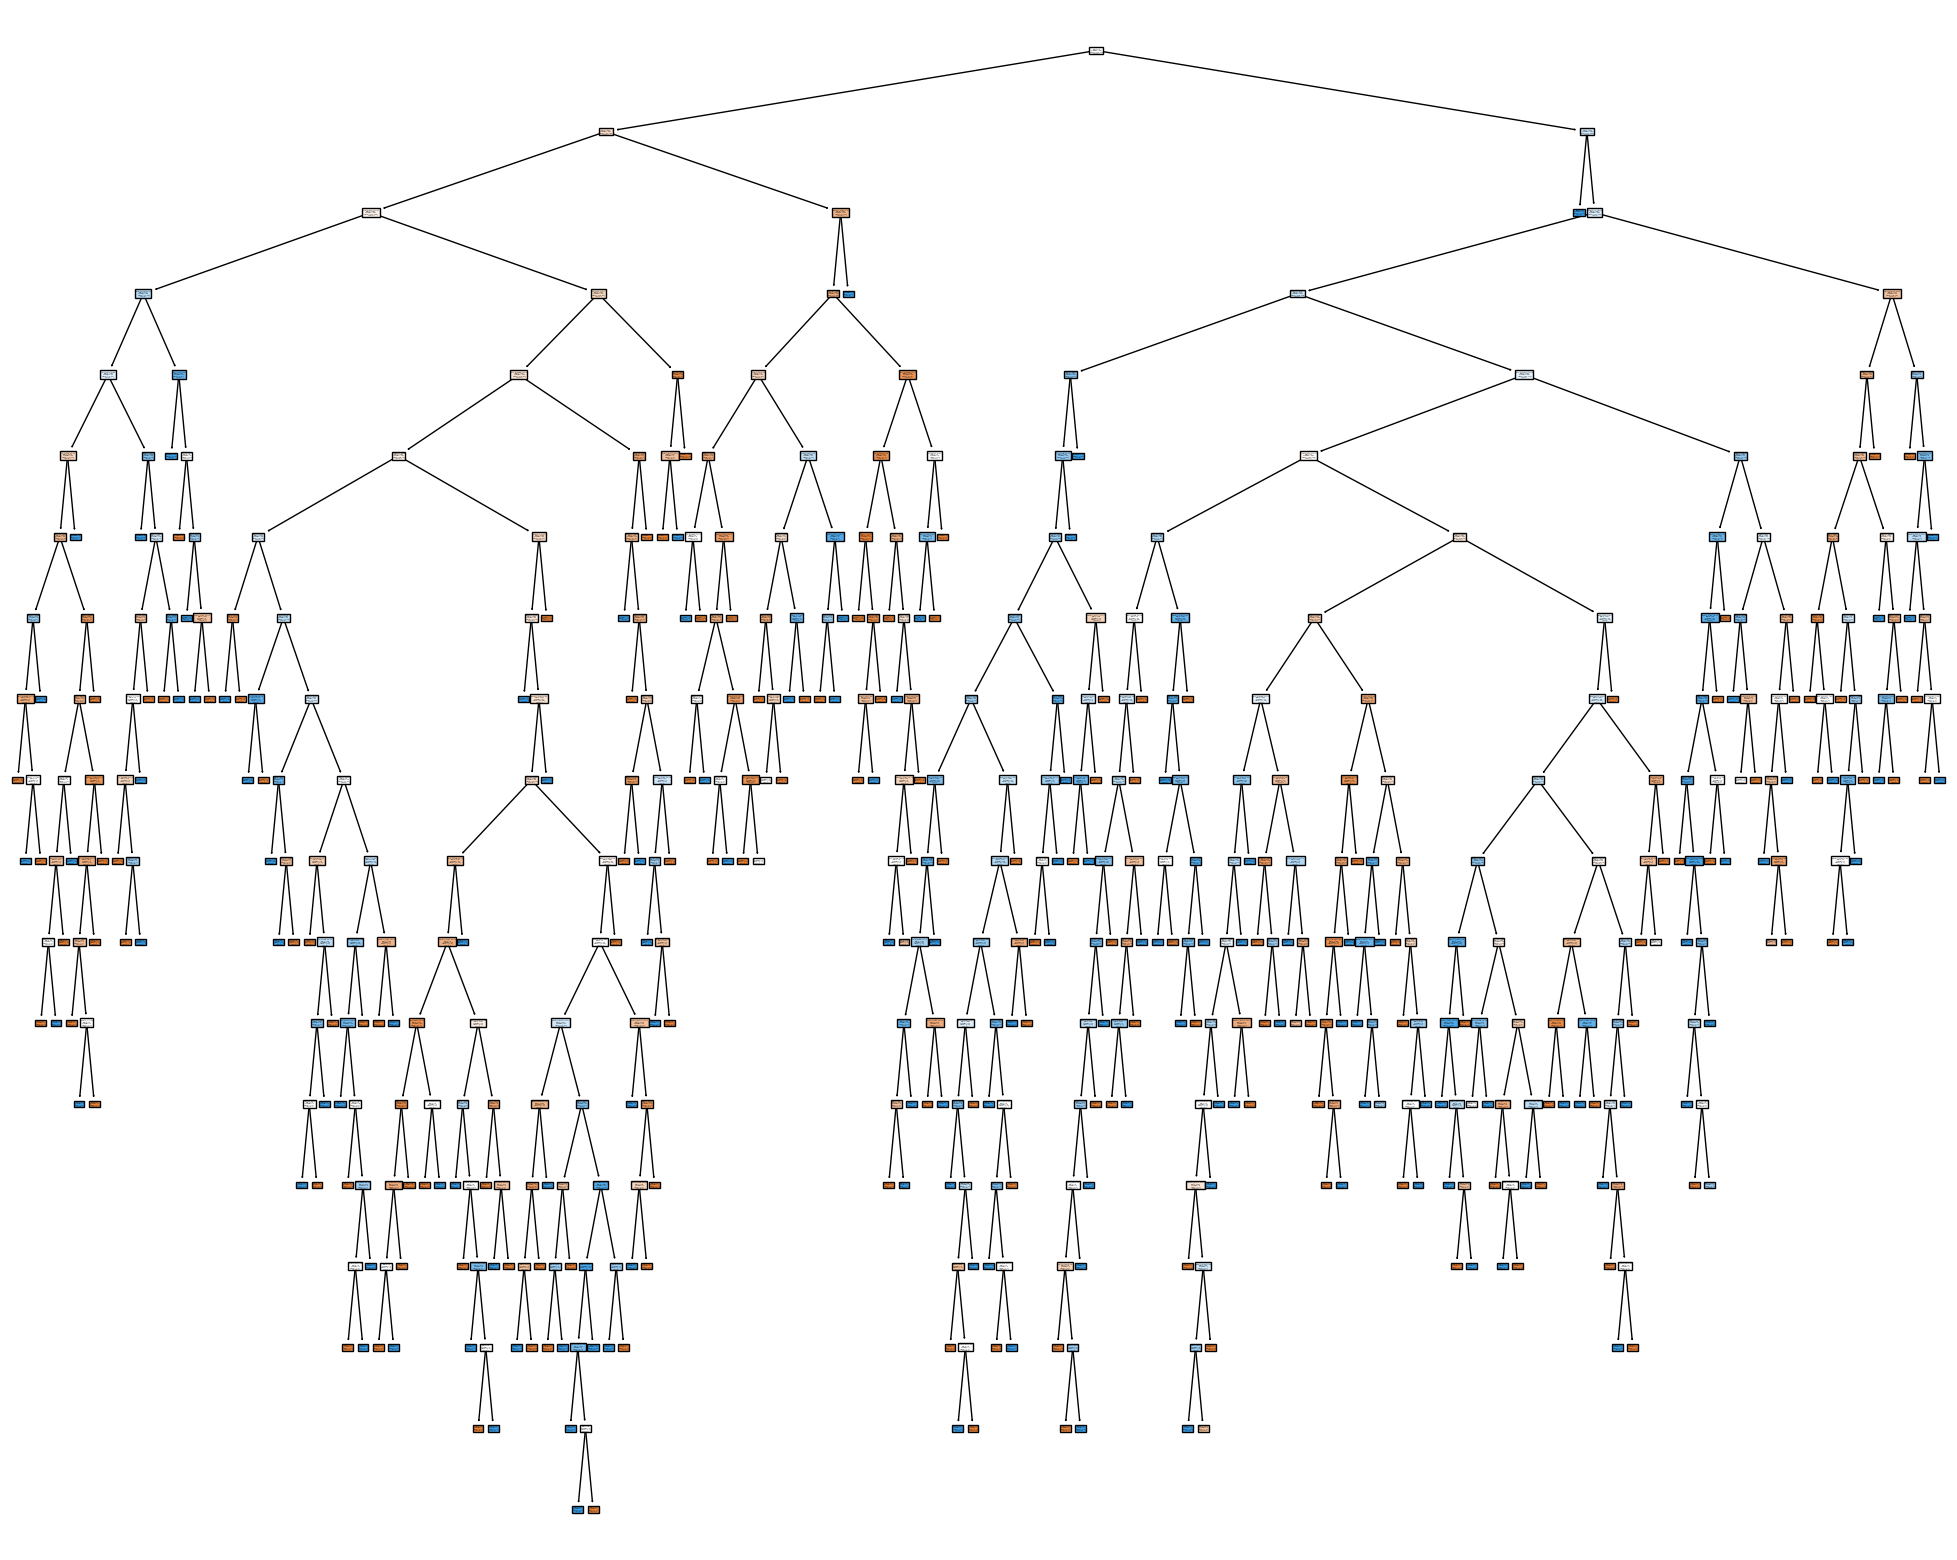

In [23]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_grid_dt, 
                   feature_names=X_train.columns.values.tolist(),  
                   class_names=y_train.name,
                   filled=True)

In [24]:
fig.savefig("decision_tree Q3.png")

Max Depth =  1 , Train Acc. =  0.573 , Test Acc. =  0.55
Max Depth =  2 , Train Acc. =  0.573 , Test Acc. =  0.55
Max Depth =  3 , Train Acc. =  0.617 , Test Acc. =  0.541
Max Depth =  4 , Train Acc. =  0.62 , Test Acc. =  0.536
Max Depth =  5 , Train Acc. =  0.639 , Test Acc. =  0.598
Max Depth =  6 , Train Acc. =  0.676 , Test Acc. =  0.598
Max Depth =  7 , Train Acc. =  0.724 , Test Acc. =  0.612
Max Depth =  8 , Train Acc. =  0.756 , Test Acc. =  0.656
Max Depth =  9 , Train Acc. =  0.789 , Test Acc. =  0.689
Max Depth =  10 , Train Acc. =  0.825 , Test Acc. =  0.675
Max Depth =  11 , Train Acc. =  0.863 , Test Acc. =  0.732
Max Depth =  12 , Train Acc. =  0.899 , Test Acc. =  0.737
Max Depth =  13 , Train Acc. =  0.926 , Test Acc. =  0.746
Max Depth =  14 , Train Acc. =  0.953 , Test Acc. =  0.785
Max Depth =  15 , Train Acc. =  0.967 , Test Acc. =  0.78
Max Depth =  16 , Train Acc. =  0.979 , Test Acc. =  0.785
Max Depth =  17 , Train Acc. =  0.982 , Test Acc. =  0.785
Max Depth 

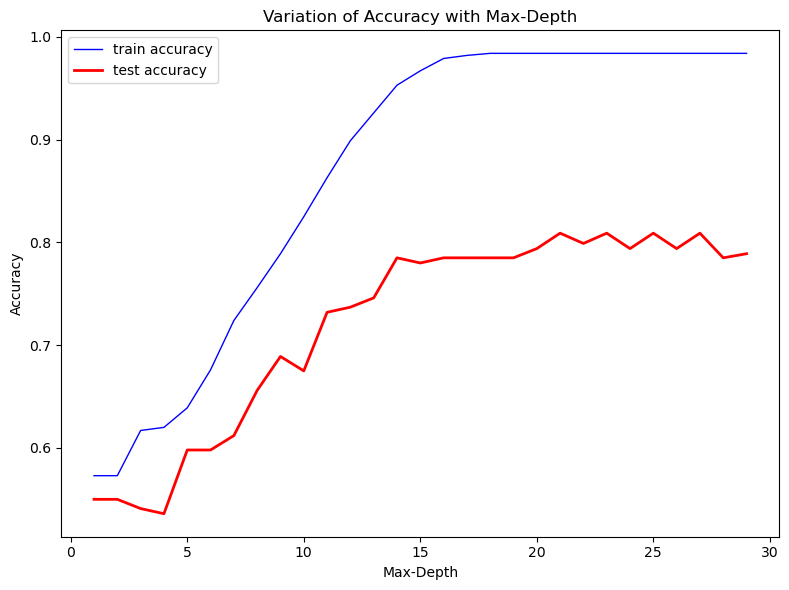

In [25]:
train_acc = []
test_acc = []
max_depth =[]

for depth in range(1, 30):
    clf = DecisionTreeClassifier(max_depth = depth)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)).round(3))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)).round(3))
    max_depth.append(depth)

for i in range(1, 30):
    print('Max Depth = ', i, ', Train Acc. = ', train_acc[i-1], ', Test Acc. = ' ,
         test_acc[i-1])

plt.figure(figsize = (8,6))
plt.xlabel('Max-Depth')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with Max-Depth')
plt.plot(max_depth, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(max_depth, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against max_depth')
plt.show();

In [26]:
# Confusion matrix for train set
print("Confusion Matrix for Train Set")
pd. DataFrame (confusion_matrix(y_train, best_grid_dt.predict(X_train)))


Confusion Matrix for Train Set


0    1
0  444    2
1   12  434

In [27]:
# Confusion matrix for test set
print("Confusion Matrix for Test Set")
pd. DataFrame (confusion_matrix(y_test, best_grid_dt.predict(X_test)))

Confusion Matrix for Test Set


0   1
0  104  23
1   17  65

In [28]:
print("Classification Report for Train Set")
print(classification_report (y_train, best_grid_dt.predict(X_train).round (3)))

Classification Report for Train Set
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       446
         1.0       1.00      0.97      0.98       446

    accuracy                           0.98       892
   macro avg       0.98      0.98      0.98       892
weighted avg       0.98      0.98      0.98       892



In [29]:
print("Classification Report for Test Set")
print(classification_report(y_test, best_grid_dt.predict (X_test). round(3)))

Classification Report for Test Set
              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84       127
         1.0       0.74      0.79      0.76        82

    accuracy                           0.81       209
   macro avg       0.80      0.81      0.80       209
weighted avg       0.81      0.81      0.81       209



## Hyperparameter Tuning on Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [31]:
param_grid= {
    'n_estimators': [10, 50, 100, 500],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 30, 100],
    'max_features': [None, 'sqrt', 'log2']
}

param_grid= {
    'n_estimators': [10]
}

In [32]:
rf_grid = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_rf.fit(X_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=g

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
480 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/job

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 30, 100],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 500]},
             verbose=2)

In [33]:
# Finding out the best estimator
best_grid_rf = grid_search_rf.best_estimator_
best_grid_rf

RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=500)

## Applying best estimators in Random Forest

In [34]:
best_grid_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=500)

### Train

[[441   5]
 [  9 437]]
Accuracy Score 0.984304932735426
Classification report: 
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       446
         1.0       0.99      0.98      0.98       446

    accuracy                           0.98       892
   macro avg       0.98      0.98      0.98       892
weighted avg       0.98      0.98      0.98       892



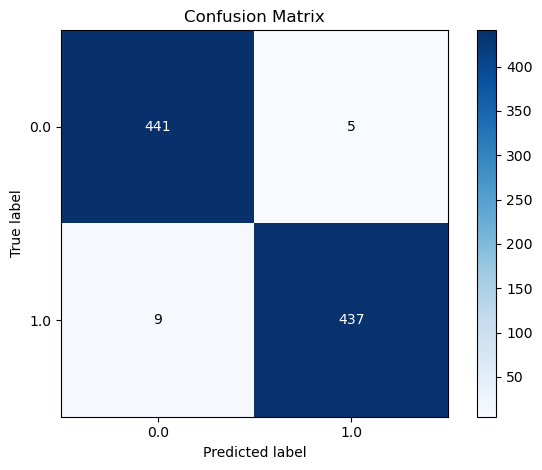

In [35]:
y_pred=best_grid_rf.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred, cmap='Blues');
save_fig('Train Set Confusion Matrix for Random Forest hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test

In [36]:
y_pred = best_grid_rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

[[100  27]
 [ 20  62]]
Accuracy Score 0.7751196172248804
Classification report: 
              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81       127
         1.0       0.70      0.76      0.73        82

    accuracy                           0.78       209
   macro avg       0.76      0.77      0.77       209
weighted avg       0.78      0.78      0.78       209



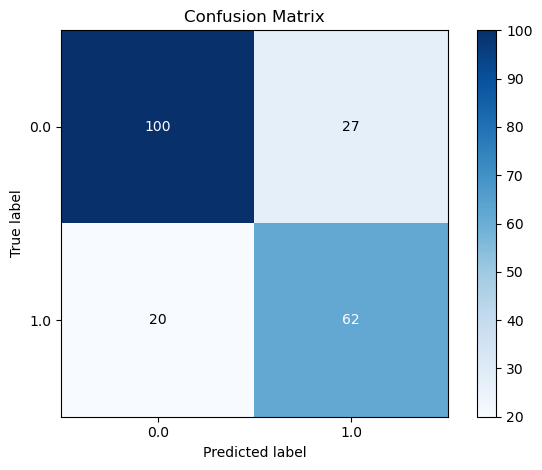

In [37]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for Random forest hyper-para tuned q3')

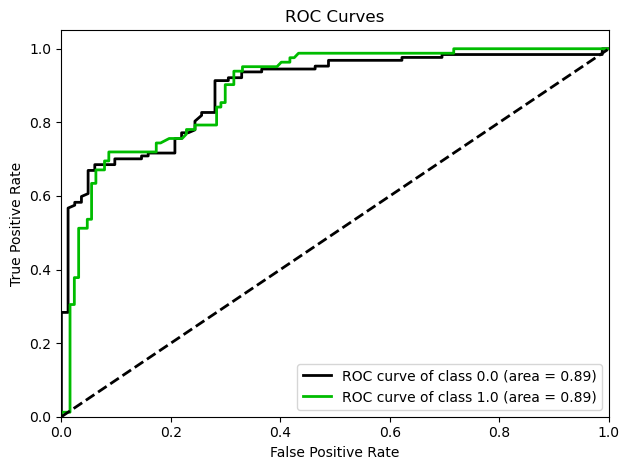

In [38]:
y_probas = best_grid_rf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro = False, plot_macro = False)
save_fig('ROC Curve-Random Forest Q3')
plt.show();

## Hyperparameter Tuning on Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
param_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet', None],
    'random_state' : ['42', None],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [41]:
lr_grid = LogisticRegression()
grid_search_lr = GridSearchCV(estimator=lr_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_lr.fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gin

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
410 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aymanibnehakim/opt/anaco

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None],
                         'random_state': ['42', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             verbose=2)

In [42]:
best_grid_lr = grid_search_lr.best_estimator_
best_grid_lr

LogisticRegression(penalty='l1', solver='saga')

In [43]:
# Applying the best grid for logistic regression
best_grid_lr.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='saga')

### Train Set

[[274 172]
 [165 281]]
Accuracy Score 0.6221973094170403
Classification report: 
              precision    recall  f1-score   support

         0.0       0.62      0.61      0.62       446
         1.0       0.62      0.63      0.63       446

    accuracy                           0.62       892
   macro avg       0.62      0.62      0.62       892
weighted avg       0.62      0.62      0.62       892



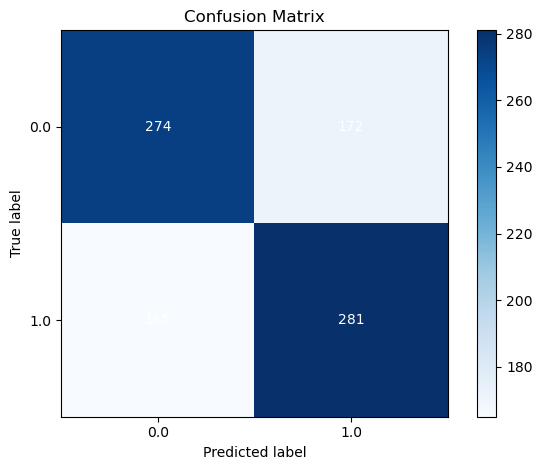

In [44]:
y_pred=best_grid_lr.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred);
save_fig('Train Set Confusion Matrix for Logistic Regression hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test Set

[[77 50]
 [27 55]]
Accuracy Score 0.631578947368421
Classification report: 
              precision    recall  f1-score   support

         0.0       0.74      0.61      0.67       127
         1.0       0.52      0.67      0.59        82

    accuracy                           0.63       209
   macro avg       0.63      0.64      0.63       209
weighted avg       0.66      0.63      0.64       209



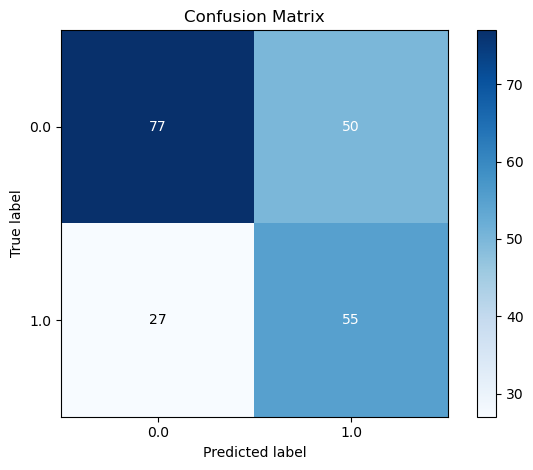

In [45]:
y_pred=best_grid_lr.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for Logistic Regression hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Hyperparameter Tuning on SVM

In [46]:
from sklearn.svm import SVC

In [47]:
param_grid = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'random_state' : [42, None],
    #'C': [0.1, 1, 10, 100, 1000],
    #'gamma' : ['scale', 'auto'],
    'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
    'shrinking' : [True, False],
    'probability' : [True, False],
    'break_ties' : [True, False]
}

In [48]:
svc_grid = SVC()
grid_search_svc = GridSearchCV(estimator=svc_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_svc.fit(X_train,y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=7; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=7; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=8; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=8; total time=   0.0s
[CV] END ........................criterion=g

[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=7; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=7; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=9; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=9; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=12; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=12; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=12; total time=   0.0s
[CV] END ...................

[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=7; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=7; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=8; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=8; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=9; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=9; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=11; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=11; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=11; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=11; total time=   0.0s
[CV] END ...................

[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=15; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=15; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=15; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=15; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=17; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=17; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=18; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=None, n_e

[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=8; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=8; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=8; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=8; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=10; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=10; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=10; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=10; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=12; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=12; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=12; total time=   0.0s
[CV] END ...................

[CV] END criterion=log_loss, max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=None, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=None, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=None, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=None, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=None, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=None, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=None, max_features=log2, n_estimators=50; total time=   0.0

[CV] END criterion=entropy, max_depth=100, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=100, max_features=sqrt, n_estimators=500; total time=   1.1s
[CV] END criterion=entropy, max_depth=100, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=100, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=100, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=100, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=100, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=100, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=100, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=100, max_features=log2, n_estimators=100; total time=   0.3s
[CV] END criterio

[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criteri

[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=500; total time=   0.1s
[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=500; total time=   0.1s
[CV] END ............penalty=l1, random_state=42, solver=sag; total time=   0.0s
[CV] END ............penalty=l1, random_state=42, solver=sag; total time=   0.0s
[CV] END ........penalty=l1, random_state=None, solver=lbfgs; total time=   0.0s
[CV] END ........penalty=l1, random_state=None, solver=lbfgs; total time=   0.0s
[CV] END ........penalty=l1, random_state=None, solver=lbfgs; total time=   0.0s
[CV] END ........penalty=l1, random_state=None, solver=lbfgs; total time=   0.0s
[CV] END ........penalty=l1, random_state=None, solver=lbfgs; total time=   0.0s
[CV] END ........penalty=l1, random_state=None, solver=lbfgs; total time=   0.0s
[CV] END ....penalty=l1, random_state=None, solver=l

[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END ......penalty=l1, random_state=42, solver=liblinear; total time=   0.0s
[CV] END ......penalty=l1, random_state=42, solver=liblinear; total time=   0.0s
[CV] END ......penalty=l1, random_state=42, solver=liblinear; total time=   0.0s
[CV] END ......penalty=l1, random_state=42, solver=liblinear; total time=   0.0s
[CV] END penalty=l1, random_state=42, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=l1, random_state=42, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=l1, random_state=42, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=l1, random_state=42, solver=newton-cholesky; total time=   0.0s
[CV] END ............penalty=l1, random_state=42, solver=sag; total time=   0.0s
[CV] END ............penalty=l1, random_state=42, solver=sag; total time=   0.0s
[CV] END ............penalty=l1, random_state=42, solver=sag; total time=   0.0s
[CV] END 

[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=500; total time=   0.2s
[CV] END criterion

[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END c

[CV] END break_ties=True, gamma=1, kernel=linear, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=True, gamma=1, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=True, gamma=1, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=True, gamma=1, kernel=linear, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=1, kernel=linear, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=True, gamma=1, kernel=linear, probability=False, random_state=None, shrinking=False; total time=   0.0s
[CV] END break_ties=True, gamma=1, kernel=poly, probability=True, random_state=42, shrinking=True; total time=   0.6s
[CV] END break_ties=True, gamma=1, kernel=poly, probability=True, random_state=42, shrinking=True; total time=   0.6s
[CV] END break_ties=True, gamm

[CV] END break_ties=True, gamma=1, kernel=sigmoid, probability=True, random_state=42, shrinking=False; total time=   0.4s
[CV] END break_ties=True, gamma=1, kernel=sigmoid, probability=True, random_state=42, shrinking=False; total time=   0.4s
[CV] END break_ties=True, gamma=1, kernel=sigmoid, probability=True, random_state=None, shrinking=True; total time=   0.3s
[CV] END break_ties=True, gamma=1, kernel=sigmoid, probability=True, random_state=None, shrinking=True; total time=   0.3s
[CV] END break_ties=True, gamma=1, kernel=sigmoid, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=1, kernel=sigmoid, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=1, kernel=sigmoid, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=1, kernel=sigmoid, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_t

[CV] END break_ties=True, gamma=0.1, kernel=rbf, probability=True, random_state=42, shrinking=False; total time=   0.4s
[CV] END break_ties=True, gamma=0.1, kernel=rbf, probability=True, random_state=None, shrinking=True; total time=   0.5s
[CV] END break_ties=True, gamma=0.1, kernel=rbf, probability=True, random_state=None, shrinking=True; total time=   0.4s
[CV] END break_ties=True, gamma=0.1, kernel=rbf, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=0.1, kernel=rbf, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=0.1, kernel=rbf, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=0.1, kernel=rbf, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=0.1, kernel=rbf, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=0.1, 

[CV] END break_ties=True, gamma=0.1, kernel=sigmoid, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=0.1, kernel=sigmoid, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=0.1, kernel=sigmoid, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=0.01, kernel=linear, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=True, gamma=0.01, kernel=linear, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=True, gamma=0.01, kernel=linear, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=True, gamma=0.01, kernel=linear, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=True, gamma=0.01, kernel=linear, probability=True, random_state=None, shrinking=False; total time=   0.2s
[C

[CV] END break_ties=True, gamma=0.01, kernel=poly, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=0.01, kernel=poly, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=0.01, kernel=poly, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=0.01, kernel=poly, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=0.01, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=0.01, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=0.01, kernel=poly, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=0.01, kernel=poly, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END bre

[CV] END break_ties=True, gamma=0.1, kernel=rbf, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=0.1, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=0.1, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=0.1, kernel=sigmoid, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=True, gamma=0.1, kernel=sigmoid, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=True, gamma=0.1, kernel=sigmoid, probability=True, random_state=None, shrinking=True; total time=   0.4s
[CV] END break_ties=True, gamma=0.1, kernel=sigmoid, probability=True, random_state=None, shrinking=True; total time=   0.4s
[CV] END break_ties=True, gamma=0.1, kernel=sigmoid, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END b

[CV] END break_ties=True, gamma=0.01, kernel=rbf, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=0.01, kernel=rbf, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=0.01, kernel=rbf, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=0.01, kernel=rbf, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=0.01, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=0.01, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=0.01, kernel=sigmoid, probability=True, random_state=42, shrinking=True; total time=   0.4s
[CV] END break_ties=True, gamma=0.01, kernel=sigmoid, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break

[CV] END break_ties=True, gamma=0.01, kernel=sigmoid, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=True, gamma=0.01, kernel=sigmoid, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=True, gamma=0.01, kernel=sigmoid, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=True, gamma=0.01, kernel=sigmoid, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=True, gamma=0.01, kernel=sigmoid, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=True, gamma=0.01, kernel=sigmoid, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=True, gamma=0.01, kernel=sigmoid, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=0.01, kernel=sigmoid, probability=False, random_state=None, shrinking=True; total time=  

[CV] END break_ties=True, gamma=0.001, kernel=linear, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=0.001, kernel=linear, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=0.001, kernel=linear, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=0.001, kernel=linear, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=True, gamma=0.001, kernel=linear, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=0.001, kernel=linear, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=0.001, kernel=poly, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=True, gamma=0.001, kernel=poly, probability=True, random_state=42, shrinking=True; total time=  

[CV] END break_ties=True, gamma=0.0001, kernel=sigmoid, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=False, gamma=1, kernel=linear, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=False, gamma=1, kernel=linear, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=False, gamma=1, kernel=linear, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=False, gamma=1, kernel=linear, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=False, gamma=1, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=False, gamma=1, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=False, gamma=1, kernel=linear, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END brea

[CV] END break_ties=True, gamma=0.0001, kernel=rbf, probability=True, random_state=None, shrinking=True; total time=   0.4s
[CV] END break_ties=True, gamma=0.0001, kernel=rbf, probability=True, random_state=None, shrinking=True; total time=   0.4s
[CV] END break_ties=True, gamma=0.0001, kernel=rbf, probability=True, random_state=None, shrinking=False; total time=   0.4s
[CV] END break_ties=True, gamma=0.0001, kernel=rbf, probability=True, random_state=None, shrinking=False; total time=   0.4s
[CV] END break_ties=True, gamma=0.0001, kernel=sigmoid, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=True, gamma=0.0001, kernel=sigmoid, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=True, gamma=0.0001, kernel=sigmoid, probability=True, random_state=None, shrinking=True; total time=   0.3s
[CV] END break_ties=True, gamma=0.0001, kernel=sigmoid, probability=True, random_state=None, shrinking=True; total time=  

[CV] END break_ties=True, gamma=0.0001, kernel=linear, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=True, gamma=0.0001, kernel=poly, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=True, gamma=0.0001, kernel=poly, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=True, gamma=0.0001, kernel=poly, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=True, gamma=0.0001, kernel=poly, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=True, gamma=0.0001, kernel=poly, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=True, gamma=0.0001, kernel=poly, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=True, gamma=0.0001, kernel=poly, probability=False, random_state=None, shrinking=False; total time=   0.1s

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'break_ties': [True, False],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'probability': [True, False],
                         'random_state': [42, None],
                         'shrinking': [True, False]},
             verbose=2)

In [49]:
best_grid_svc = grid_search_svc.best_estimator_
best_grid_svc

SVC(break_ties=True, gamma=1, kernel='poly', probability=True, random_state=42)

In [50]:
# Applying the best grid for SVC
best_grid_svc.fit(X_train, y_train)

SVC(break_ties=True, gamma=1, kernel='poly', probability=True, random_state=42)

### Train Set

[[380  66]
 [ 58 388]]
Accuracy Score 0.8609865470852018
Classification report: 
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86       446
         1.0       0.85      0.87      0.86       446

    accuracy                           0.86       892
   macro avg       0.86      0.86      0.86       892
weighted avg       0.86      0.86      0.86       892



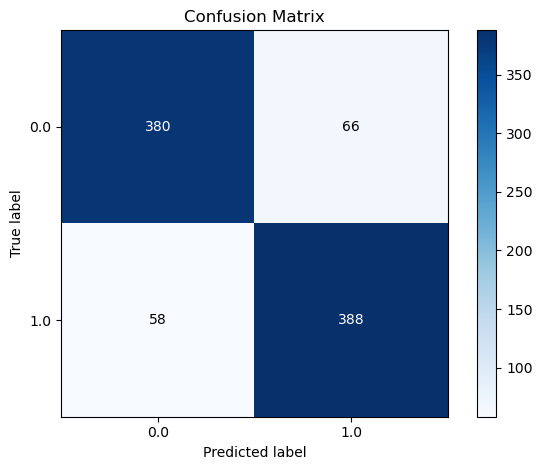

In [51]:
y_pred=best_grid_svc.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred);
save_fig('Train Set Confusion Matrix for SVM hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test Set

[[80 47]
 [28 54]]
Accuracy Score 0.6411483253588517
Classification report: 
              precision    recall  f1-score   support

         0.0       0.74      0.63      0.68       127
         1.0       0.53      0.66      0.59        82

    accuracy                           0.64       209
   macro avg       0.64      0.64      0.64       209
weighted avg       0.66      0.64      0.65       209



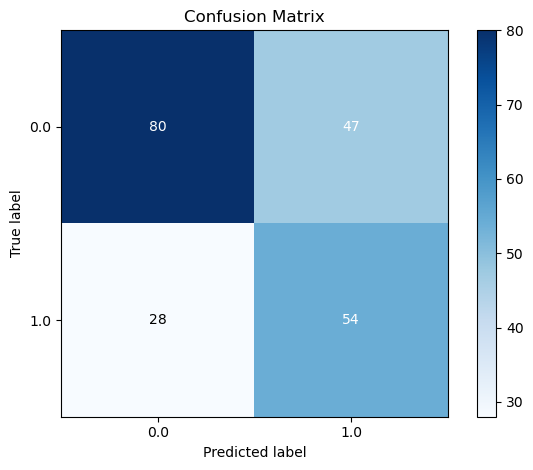

In [52]:
y_pred=best_grid_svc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for SVC hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Hyperparameter Tuning on Multinomial Naive Bayes

In [53]:
from  sklearn.naive_bayes import MultinomialNB

In [54]:
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
    'fit_prior': [True, False]
}

In [55]:
nb_grid = MultinomialNB()
grid_search_nb = GridSearchCV(estimator=nb_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_nb.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=10, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
                         'fit_prior': [True, False]},
             verbose=2)

In [56]:
best_grid_nb = grid_search_nb.best_estimator_
best_grid_nb

MultinomialNB(alpha=10.0, fit_prior=False)

In [57]:
# Applying the best grid for Multinomial Naive Bayes
best_grid_nb.fit(X_train, y_train)

MultinomialNB(alpha=10.0, fit_prior=False)

### Train Set

[[270 176]
 [189 257]]
Accuracy Score 0.5908071748878924
Classification report: 
              precision    recall  f1-score   support

         0.0       0.59      0.61      0.60       446
         1.0       0.59      0.58      0.58       446

    accuracy                           0.59       892
   macro avg       0.59      0.59      0.59       892
weighted avg       0.59      0.59      0.59       892



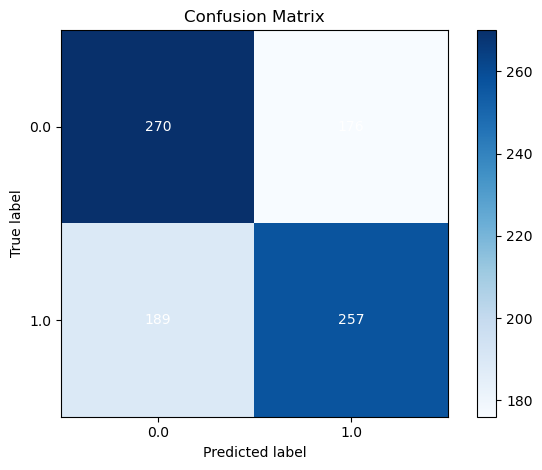

In [58]:
y_pred=best_grid_nb.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred);
save_fig('Train Set Confusion Matrix for Multinomial NB hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test Set

[[76 51]
 [34 48]]
Accuracy Score 0.5933014354066986
Classification report: 
              precision    recall  f1-score   support

         0.0       0.69      0.60      0.64       127
         1.0       0.48      0.59      0.53        82

    accuracy                           0.59       209
   macro avg       0.59      0.59      0.59       209
weighted avg       0.61      0.59      0.60       209



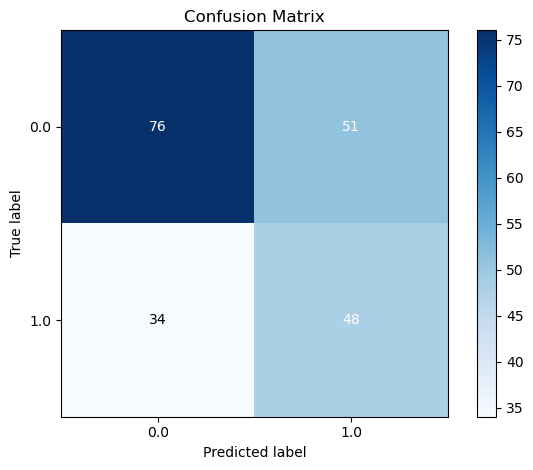

In [59]:
y_pred=best_grid_nb.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for MultinomialNB hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Ensemble Learning

In [60]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Hard Voting classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [62]:
#log_clf = LogisticRegression(random_state=42)
#rnd_clf = RandomForestClassifier(random_state=42)
#svm_clf = SVC(random_state=42)
hard_voting_clf = VotingClassifier(
    estimators=[
        ('knn', best_grid_knn),
        ('dt', best_grid_dt),
        ('lr', best_grid_lr),
        ('rf', best_grid_rf),
        ('svc', best_grid_svc),
        #('nb', best_grid_nb)
    ], 
    voting = 'hard'
)
hard_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=2)),
                             ('dt', DecisionTreeClassifier(max_depth=19)),
                             ('lr',
                              LogisticRegression(penalty='l1', solver='saga')),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_features='log2',
                                                     n_estimators=500)),
                             ('svc',
                              SVC(break_ties=True, gamma=1, kernel='poly',
                                  probability=True, random_state=42))])

In [63]:
from sklearn.metrics import accuracy_score
for clf in [best_grid_knn, best_grid_dt, best_grid_lr, best_grid_rf, best_grid_svc, hard_voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier 0.6602870813397129
DecisionTreeClassifier 0.784688995215311
LogisticRegression 0.631578947368421
RandomForestClassifier 0.784688995215311
SVC 0.6411483253588517
VotingClassifier 0.7799043062200957


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Train Set

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

Accuracy Score 0.968609865470852
Classification report: 
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       446
         1.0       1.00      0.94      0.97       446

    accuracy                           0.97       892
   macro avg       0.97      0.97      0.97       892
weighted avg       0.97      0.97      0.97       892



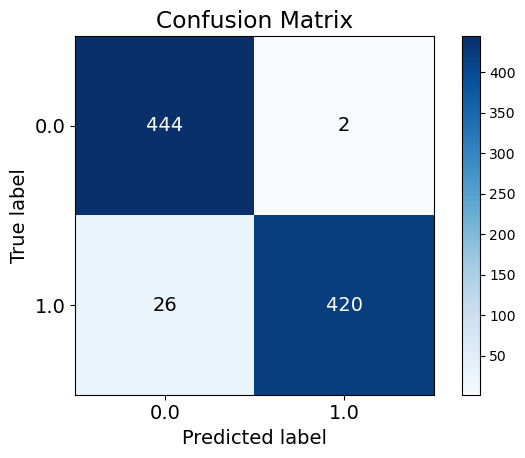

In [64]:
skplt.metrics.plot_confusion_matrix(y_train, hard_voting_clf.predict(X_train));
save_fig('Train Set Confusion Matrix for Ensemble Hard Voting q3')
print("Accuracy Score {}".format(accuracy_score(y_train, hard_voting_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, hard_voting_clf.predict(X_train))))

### Test Set

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy Score 0.7799043062200957
Classification report: 
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82       127
         1.0       0.72      0.72      0.72        82

    accuracy                           0.78       209
   macro avg       0.77      0.77      0.77       209
weighted avg       0.78      0.78      0.78       209



/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

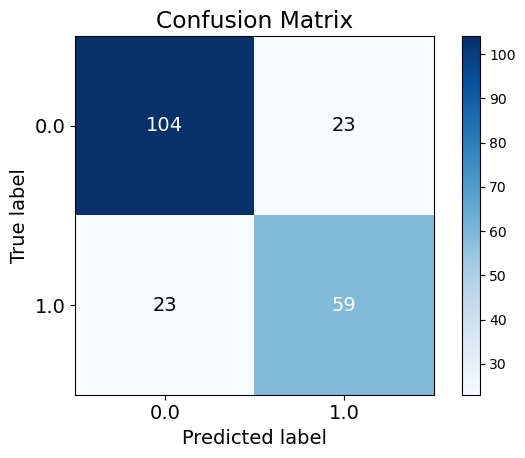

In [65]:
skplt.metrics.plot_confusion_matrix(y_test, hard_voting_clf.predict(X_test));
save_fig('Test Set Confusion Matrix for Ensemble Hard Voting q3')
print("Accuracy Score {}".format(accuracy_score(y_test, hard_voting_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, hard_voting_clf.predict(X_test))))

## Soft voting classifier

In [66]:
soft_voting_clf = VotingClassifier(
    estimators=[
        ('knn', best_grid_knn),
        ('dt', best_grid_dt),
        ('lr', best_grid_lr),
        ('rf', best_grid_rf),
        ('svc', best_grid_svc),
        ('nb', best_grid_nb)
    ], 
    voting = 'soft'
)
soft_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=2)),
                             ('dt', DecisionTreeClassifier(max_depth=19)),
                             ('lr',
                              LogisticRegression(penalty='l1', solver='saga')),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_features='log2',
                                                     n_estimators=500)),
                             ('svc',
                              SVC(break_ties=True, gamma=1, kernel='poly',
                                  probability=True, random_state=42)),
                             ('nb',
                              MultinomialNB(alpha=10.0, fit_prior=False))],
                 voting='soft')

In [67]:
from sklearn.metrics import accuracy_score
for clf in [best_grid_knn, best_grid_dt, best_grid_lr, best_grid_rf, best_grid_svc, best_grid_nb, soft_voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier 0.6602870813397129
DecisionTreeClassifier 0.8086124401913876
LogisticRegression 0.631578947368421
RandomForestClassifier 0.784688995215311
SVC 0.6411483253588517
MultinomialNB 0.5933014354066986
VotingClassifier 0.7942583732057417


### Train Set

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

Accuracy Score 0.968609865470852
Classification report: 
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       446
         1.0       1.00      0.94      0.97       446

    accuracy                           0.97       892
   macro avg       0.97      0.97      0.97       892
weighted avg       0.97      0.97      0.97       892



/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


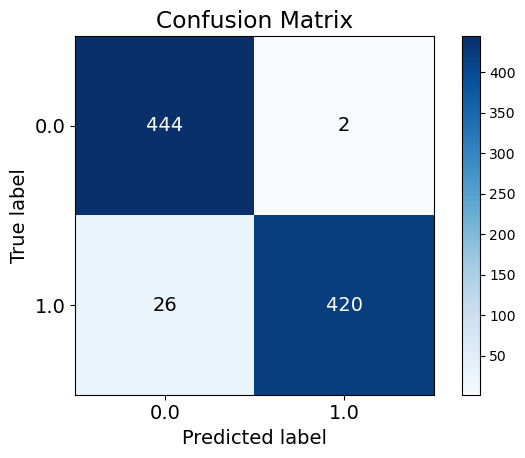

In [68]:
skplt.metrics.plot_confusion_matrix(y_train, hard_voting_clf.predict(X_train));
save_fig('Train Set Confusion Matrix for Ensemble Soft Voting q3')
print("Accuracy Score {}".format(accuracy_score(y_train, hard_voting_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, hard_voting_clf.predict(X_train))))

### Test Set

Accuracy Score 0.7942583732057417
Classification report: 
              precision    recall  f1-score   support

         0.0       0.86      0.79      0.82       127
         1.0       0.71      0.80      0.75        82

    accuracy                           0.79       209
   macro avg       0.79      0.80      0.79       209
weighted avg       0.80      0.79      0.80       209



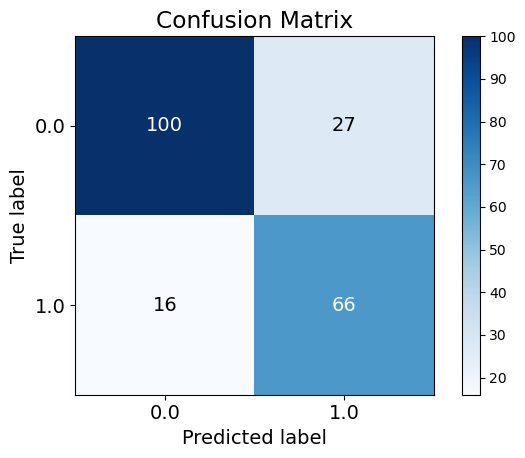

In [69]:
skplt.metrics.plot_confusion_matrix(y_test, soft_voting_clf.predict(X_test));
save_fig('Test Set Confusion Matrix for Ensemble Soft Voting q3')
print("Accuracy Score {}".format(accuracy_score(y_test, soft_voting_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, soft_voting_clf.predict(X_test))))

## bagging and pasting

In [70]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

## out of bag evaluation

In [71]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            oob_score=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
print('OOB Score', bag_clf.oob_score_)

y_pred = bag_clf.predict(X_test)
print('Test Accuracy', accuracy_score(y_test, y_pred))
print('Train Accuracy', accuracy_score(y_train, bag_clf.predict(X_train)))

OOB Score 0.8060538116591929
Test Accuracy 0.7751196172248804
Train Accuracy 0.984304932735426


Accuracy Score 0.7751196172248804
Classification report: 
              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81       127
         1.0       0.70      0.76      0.73        82

    accuracy                           0.78       209
   macro avg       0.76      0.77      0.77       209
weighted avg       0.78      0.78      0.78       209



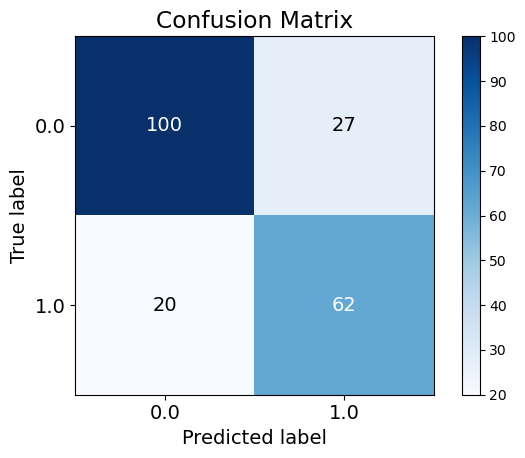

In [72]:
skplt.metrics.plot_confusion_matrix(y_test, bag_clf.predict(X_test));
save_fig('Confusion Matrix for Out of bag q3')
print("Accuracy Score {}".format(accuracy_score(y_test, bag_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, bag_clf.predict(X_test))))

Accuracy Score 0.984304932735426
Classification report: 
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       446
         1.0       0.99      0.98      0.98       446

    accuracy                           0.98       892
   macro avg       0.98      0.98      0.98       892
weighted avg       0.98      0.98      0.98       892



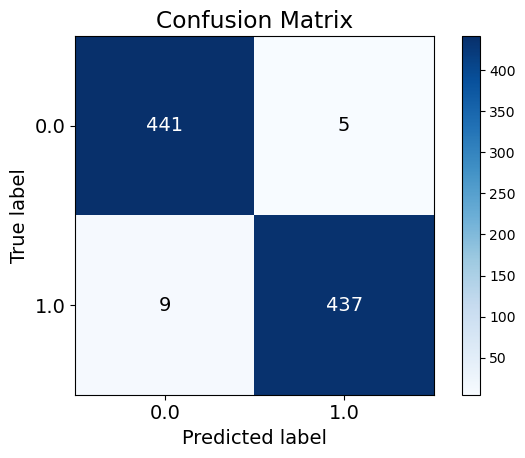

In [73]:
skplt.metrics.plot_confusion_matrix(y_train, bag_clf.predict(X_train));
save_fig('Confusion Matrix train for Out of bag q3')
print("Accuracy Score {}".format(accuracy_score(y_train, bag_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, bag_clf.predict(X_train))))

## impact of no. of estimators

In [74]:
import numpy as np
est = range(50, 500, 50)
train_acc = []
test_acc = []
oob_acc = []
estim = []
out = []
for num_est in est:
    estim.append(num_est)
    rnd_clf = RandomForestClassifier(n_estimators=num_est, oob_score = True, 
                                     max_leaf_nodes=16, n_jobs=-1, 
                                     random_state=42)
    rnd_clf.fit(X_train, y_train)
    y_pred_rf = rnd_clf.predict(X_test)
    train_acc.append(
        accuracy_score(y_train, rnd_clf.predict(X_train)))
    test_acc.append(
        accuracy_score(y_test, rnd_clf.predict(X_test)))
    oob_acc.append(rnd_clf.oob_score_)
i = 0
while i < len(estim):
    print('Num of estimators: ', estim[i], ' train acc = ', train_acc[i],
         ' test acc = ', test_acc[i], 'oob = ', oob_acc[i])
    i = i + 1

Num of estimators:  50  train acc =  0.7455156950672646  test acc =  0.6267942583732058 oob =  0.6322869955156951
Num of estimators:  100  train acc =  0.742152466367713  test acc =  0.645933014354067 oob =  0.6423766816143498
Num of estimators:  150  train acc =  0.7410313901345291  test acc =  0.6411483253588517 oob =  0.6367713004484304
Num of estimators:  200  train acc =  0.7432735426008968  test acc =  0.6363636363636364 oob =  0.6423766816143498
Num of estimators:  250  train acc =  0.7443946188340808  test acc =  0.6267942583732058 oob =  0.6378923766816144
Num of estimators:  300  train acc =  0.7511210762331838  test acc =  0.631578947368421 oob =  0.6446188340807175
Num of estimators:  350  train acc =  0.7533632286995515  test acc =  0.645933014354067 oob =  0.6468609865470852
Num of estimators:  400  train acc =  0.75  test acc =  0.6220095693779905 oob =  0.6446188340807175
Num of estimators:  450  train acc =  0.757847533632287  test acc =  0.6363636363636364 oob =  0.64

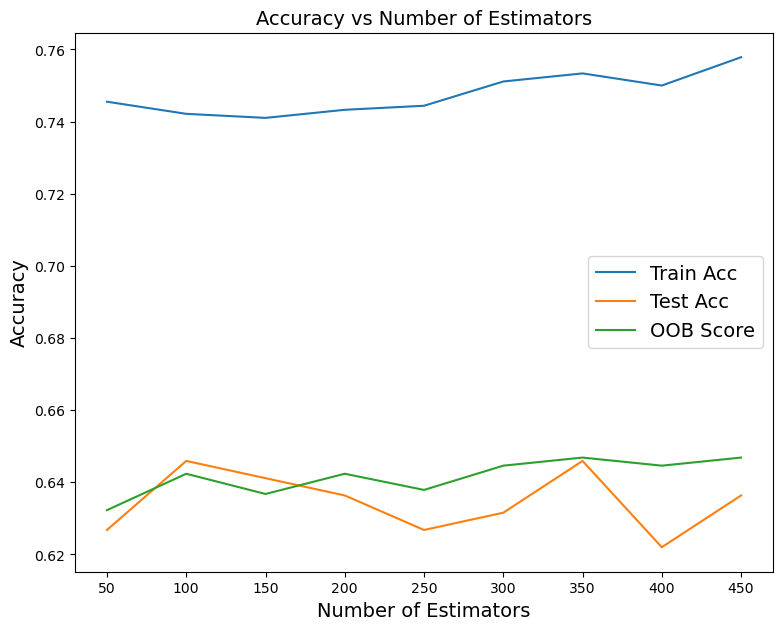

In [75]:
plt.figure(figsize = (9,7))
plt.plot(estim, train_acc, label = 'Train Acc')
plt.plot(estim, test_acc, label = 'Test Acc')
plt.plot(estim, oob_acc, label = 'OOB Score')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## ADA boost classifier

In [76]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=15), n_estimators=100,
    learning_rate=0.4, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7894736842105263

### Train Set

Accuracy Score 0.984304932735426
Classification report: 
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       446
         1.0       0.99      0.98      0.98       446

    accuracy                           0.98       892
   macro avg       0.98      0.98      0.98       892
weighted avg       0.98      0.98      0.98       892



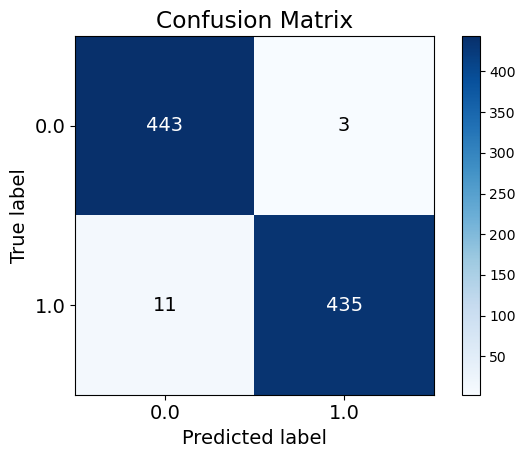

In [77]:
skplt.metrics.plot_confusion_matrix(y_train, ada_clf.predict(X_train));
save_fig('Train Set Confusion Matrix for AdaBoost q3')
print("Accuracy Score {}".format(accuracy_score(y_train, ada_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, ada_clf.predict(X_train))))

In [78]:
### Test Set

Accuracy Score 0.7894736842105263
Classification report: 
              precision    recall  f1-score   support

         0.0       0.85      0.80      0.82       127
         1.0       0.71      0.78      0.74        82

    accuracy                           0.79       209
   macro avg       0.78      0.79      0.78       209
weighted avg       0.79      0.79      0.79       209



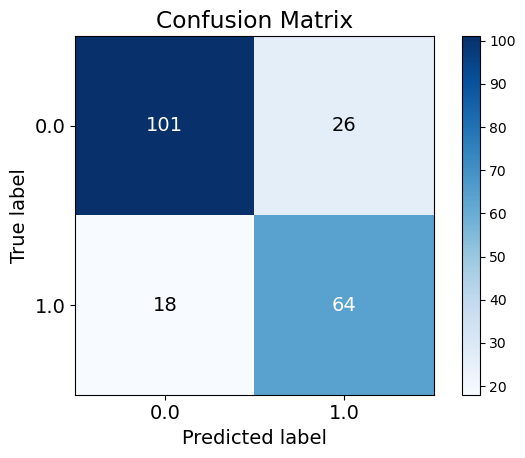

In [79]:
skplt.metrics.plot_confusion_matrix(y_test, ada_clf.predict(X_test));
save_fig('Test Set Confusion Matrix for AdaBoost q3')
print("Accuracy Score {}".format(accuracy_score(y_test, ada_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, ada_clf.predict(X_test))))

In [80]:
import numpy as np
est = np.linspace(1, 500, 2)
train_acc = []
test_acc = []
num_learners = []
for estimators in est:
    ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=int(estimators),
    learning_rate=0.5, random_state=42)
    ada_clf.fit(X_train, y_train)
    y_pred_test = ada_clf.predict(X_test)
    y_pred_train = ada_clf.predict(X_train)
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))
    num_learners.append(estimators)

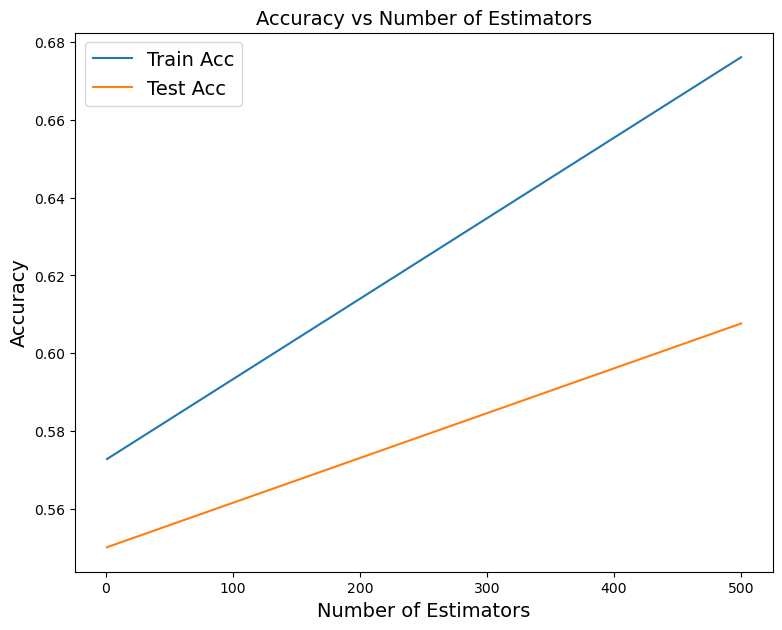

In [81]:
plt.figure(figsize = (9,7))
plt.plot(num_learners, train_acc, label = 'Train Acc')
plt.plot(num_learners, test_acc, label = 'Test Acc')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## XGBoost

In [82]:
import xgboost as xgb

In [83]:
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

0.784688995215311

### Train Set

Accuracy Score 0.9663677130044843
Classification report: 
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       446
         1.0       0.98      0.95      0.97       446

    accuracy                           0.97       892
   macro avg       0.97      0.97      0.97       892
weighted avg       0.97      0.97      0.97       892



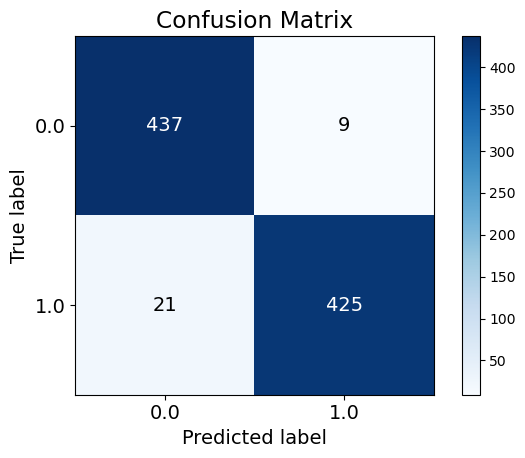

In [84]:
skplt.metrics.plot_confusion_matrix(y_train, xgb_cl.predict(X_train));
save_fig('Train Set Confusion Matrix for XGBoost q3')
print("Accuracy Score {}".format(accuracy_score(y_train, xgb_cl.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, xgb_cl.predict(X_train))))

### Test Set

Accuracy Score 0.784688995215311
Classification report: 
              precision    recall  f1-score   support

         0.0       0.84      0.80      0.82       127
         1.0       0.71      0.76      0.73        82

    accuracy                           0.78       209
   macro avg       0.77      0.78      0.78       209
weighted avg       0.79      0.78      0.79       209



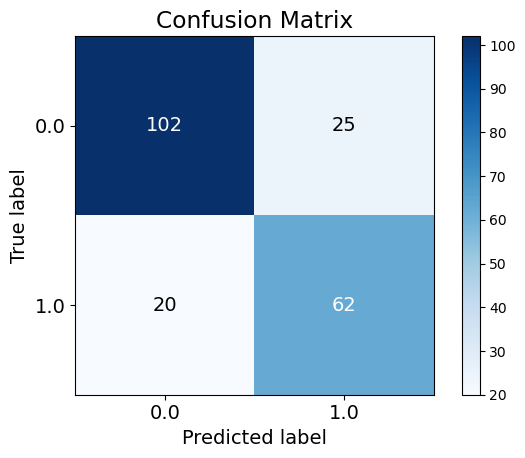

In [85]:
skplt.metrics.plot_confusion_matrix(y_test, xgb_cl.predict(X_test));
save_fig('Test Set Confusion Matrix for XGBoost q3')
print("Accuracy Score {}".format(accuracy_score(y_test, xgb_cl.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, xgb_cl.predict(X_test))))

## XAI using LIME

In [86]:
#conda install -c conda-forge ds-lime

In [87]:
from lime.lime_tabular import LimeTabularExplainer

In [88]:
feature_names = X_train.columns.tolist()
#X_train.columns.values.tolist()

In [89]:
# Create a LimeTabularExplainer object
explainer = LimeTabularExplainer(X_train.values, feature_names=feature_names, class_names=['low', 'high'])


In [90]:
# Select a specific instance from the testing set for explanation
instance_idx = 0
instance = X_test.values[instance_idx]
true_label = y_test[instance_idx]

In [91]:
# Generate explanations using LIME
#Since our accuracy is the highest for Out of Bag, we will be using OOB to interpret
explanation_lime = explainer.explain_instance(instance, best_grid_rf.predict_proba, num_features=len(feature_names))


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [92]:
# Print the true label and predicted probabilities
print("True Label:", true_label)
print("Predicted Probabilities:", best_grid_rf.predict_proba([instance]))



True Label: 1.0
Predicted Probabilities: [[0.136 0.864]]


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [93]:
# Print the top features and their weights in the LIME explanation
print("LIME Explanation:")
for feature, weight in explanation_lime.as_list():
    print(feature, weight)

LIME Explanation:
Fjob_health <= 0.00 0.14154396925487253
Pstatus_A <= 0.00 0.13923533617521422
0.14 < age <= 0.29 0.0772704743326755
famrel <= 0.66 0.07019390122019066
Fjob_teacher <= 0.00 0.06288195421947033
Fjob_at_home <= 0.00 0.05341400979961742
0.00 < famsize_LE3 <= 1.00 0.036081155949264455
0.00 < Fjob_services <= 1.00 0.03180610068841077
famsup_no <= 0.00 -0.02977794684838704
Mjob_services > 0.00 0.02898056567166804
guardian_father <= 0.00 -0.019138535036635904
Mjob_teacher <= 0.00 -0.011048813730094921
Medu <= 0.50 -0.01076011153339362
famsize_GT3 <= 0.00 0.007289651926721122
guardian_other <= 0.00 0.007204656164165442
Mjob_at_home <= 0.00 0.006089722567817336
Mjob_health <= 0.00 0.0032448468300049884
Fedu <= 0.50 -0.002418762443805358
0.00 < guardian_mother <= 1.00 0.0018412061554134512


### Feature Importance Plot

In [94]:
feature_importance = explanation_lime.as_list()


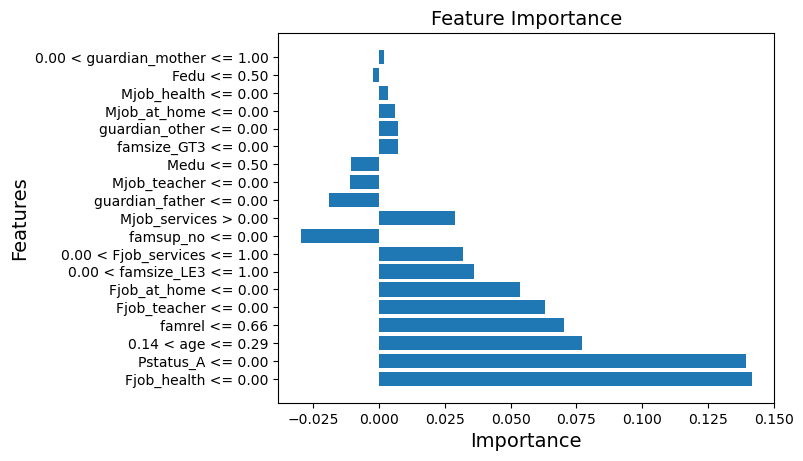

In [95]:
import matplotlib.pyplot as plt

features, values = zip(*feature_importance)
plt.barh(features, values)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.savefig('images/question 3/LIME Feature Importance q3.png')
plt.show()

### LIME Explanation Plot

In [96]:
feature_contributions = explanation_lime.local_exp[1]

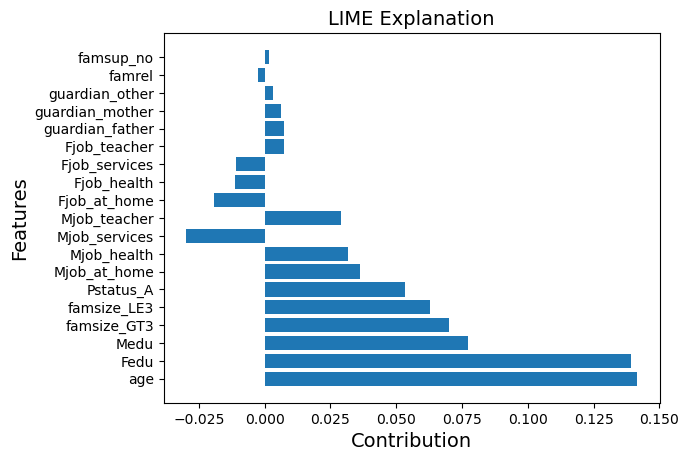

In [97]:
import matplotlib.pyplot as plt

features, contributions = zip(*feature_contributions)
plt.barh(feature_names, contributions)
plt.xlabel('Contribution')
plt.ylabel('Features')
plt.title('LIME Explanation')
plt.savefig('images/question 3/LIME Explanation Graph q3.png')
plt.show()

## Explanation for class 1

In [98]:
import matplotlib.pyplot as plt
print('Predicted: ',best_grid_rf.predict(X_test)[0])
print('Actual: ', y_test[0])
explanation_lime.show_in_notebook(show_table=True, show_all=False)
explanation_lime.save_to_file('images/question 3/LIME Prediction Probability for class 1 q3.html')

Predicted:  1.0
Actual:  1.0


### Explanation for class 0

In [99]:
#Perform the explanation on the 8th instance in the test data
explaination = explainer.explain_instance(X_test.iloc[8], best_grid_rf.predict_proba)

# show the result of the model's explaination
print('Predicted: ',best_grid_rf.predict(X_test)[8])
print('Actual: ', y_test[8])
explaination.show_in_notebook(show_table = True, show_all = False,)
explaination.save_to_file('images/question 3/LIME Prediction Probability for class 0 q3.html')


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Predicted:  0.0
Actual:  0.0


In [100]:
pd.DataFrame({'y_test': y_test, 'y_pred': best_grid_rf.predict(X_test)}).head(10)

y_test  y_pred
0     1.0     1.0
1     1.0     1.0
2     1.0     0.0
3     1.0     1.0
4     0.0     0.0
5     0.0     1.0
6     0.0     0.0
7     1.0     1.0
8     0.0     0.0
9     0.0     0.0

# SHAP

In [101]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [102]:
import shap
import matplotlib.pyplot as plt

#model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500, n_jobs=-1, oob_score=True, random_state=42)
#model.fit(X_train,y_train)

# Create a SHAP explainer
#explainer = shap.KernelExplainer(model.predict_proba,X_train)  # Replace "model" with your trained model
explainer = shap.Explainer(best_grid_rf)

# Calculate SHAP values for the entire dataset
shap_values = explainer.shap_values(X_train)  # Replace "X" with your input data

# Select the desired instance for explanation (index 0 in this example)
instance = X_train.iloc[0]  # Replace "X" with your input data

# Calculate the SHAP values for the selected instance
shap_values_instance = explainer.shap_values(instance)

# Plot the SHAP summary plot
#shap.summary_plot(shap_values, X_train)  # Replace "X" with your input data

# Plot the SHAP values for the selected instance
#shap.force_plot(explainer.expected_value, shap_values[0])

# Save the figures
#plt.savefig('images/shap_summary_plot.png', dpi=300)
#shap.save_html('images/shap_force_plot.html', shap.force_plot(explainer.expected_value, shap_values_instance, instance))

# Show the plots
#plt.show()


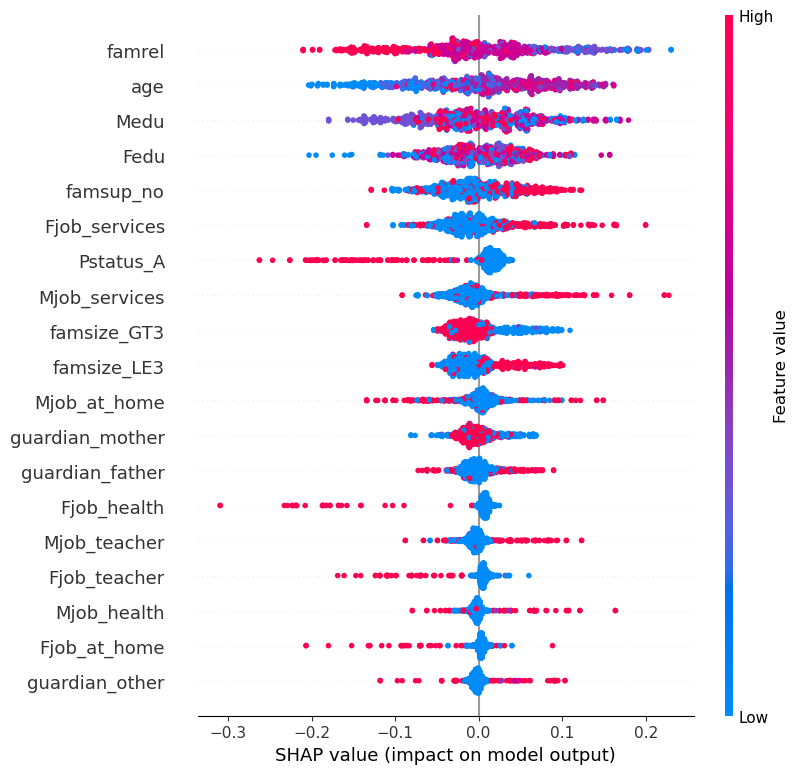

<Figure size 640x480 with 0 Axes>

In [107]:
from shap.plots import beeswarm
beeswarm(explainer(X_train)[:,:,1],max_display=20)
plt.savefig('images/question 3/beeswarm_plot.png',dpi=300, bbox_inches= 'tight')

In [104]:
pd.concat([X_test.loc[[190]],y_test.loc[[190]]], axis=1)

age  Fedu  Medu  famsize_GT3  famsize_LE3  Pstatus_A  Mjob_at_home  \
190  0.0  0.25  0.25          1.0          0.0        0.0           0.0   

     Mjob_health  Mjob_services  Mjob_teacher  Fjob_at_home  Fjob_health  \
190          0.0            0.0           0.0           0.0          0.0   

     Fjob_services  Fjob_teacher  guardian_father  guardian_mother  \
190            0.0           0.0              0.0              1.0   

     guardian_other  famrel  famsup_no  alc  
190             0.0     0.5        0.0  1.0

In [105]:
# Calculate Shap values
choosen_instance = X_test.loc[[190]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

[CV] END break_ties=False, gamma=0.01, kernel=sigmoid, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=False, gamma=0.001, kernel=linear, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=False, gamma=0.001, kernel=linear, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=False, gamma=0.001, kernel=linear, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=False, gamma=0.001, kernel=linear, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=False, gamma=0.001, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=False, gamma=0.001, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=False, gamma=0.001, kernel=linear, probability=False, random_state=42, shrinking=False; total

[CV] END break_ties=False, gamma=1, kernel=poly, probability=False, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=False, gamma=1, kernel=rbf, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=False, gamma=1, kernel=rbf, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=False, gamma=1, kernel=rbf, probability=True, random_state=None, shrinking=True; total time=   0.3s
[CV] END break_ties=False, gamma=1, kernel=rbf, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=False, gamma=1, kernel=rbf, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=False, gamma=1, kernel=rbf, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=False, gamma=1, kernel=rbf, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=False, gamma=1, ker

[CV] END break_ties=False, gamma=1, kernel=sigmoid, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=False, gamma=1, kernel=sigmoid, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=False, gamma=1, kernel=sigmoid, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=False, gamma=1, kernel=sigmoid, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=False, gamma=1, kernel=sigmoid, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=False, gamma=1, kernel=sigmoid, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=False, gamma=0.1, kernel=linear, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=False, gamma=0.1, kernel=linear, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV]

[CV] END break_ties=False, gamma=1, kernel=poly, probability=True, random_state=None, shrinking=False; total time=   0.7s
[CV] END break_ties=False, gamma=1, kernel=poly, probability=True, random_state=None, shrinking=False; total time=   0.7s
[CV] END break_ties=False, gamma=1, kernel=rbf, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=False, gamma=1, kernel=rbf, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=False, gamma=1, kernel=rbf, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=False, gamma=1, kernel=rbf, probability=True, random_state=None, shrinking=True; total time=   0.3s
[CV] END break_ties=False, gamma=1, kernel=rbf, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=False, gamma=1, kernel=rbf, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=False, gamma=1, kern

[CV] END break_ties=False, gamma=0.1, kernel=linear, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=False, gamma=0.1, kernel=linear, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=False, gamma=0.1, kernel=linear, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=False, gamma=0.1, kernel=linear, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=False, gamma=0.1, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=False, gamma=0.1, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=False, gamma=0.1, kernel=linear, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=False, gamma=0.1, kernel=linear, probability=False, random_state=42, shrinking=False; total time=   0.1s
[C